In [1]:
import pandas as pd

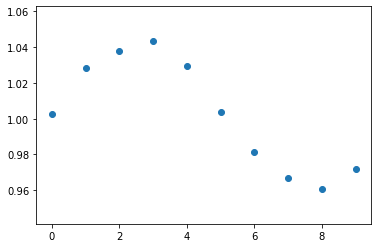

In [2]:
import natsort
from glob import glob
filenames = glob('/home/mcditoos/Desktop/DatosGerardo2/11/gerardo*.DAT')

filenames=natsort.natsorted(filenames)
filenames

import numpy as np

Coincidencias=np.array([])
for i in filenames:
    C=pd.read_csv(i,sep='\t')
    lista=C.columns
    C=C.drop([lista[0],lista[1],lista[2],lista[3],lista[5],lista[7]],axis=1)
    promedio=C[lista[8]].mean()
    Coincidencias=np.append(Coincidencias,promedio)

coincidencias11=Coincidencias[1:]/Coincidencias[0]

import matplotlib.pyplot as plt

plt.scatter(range(10),coincidencias11)

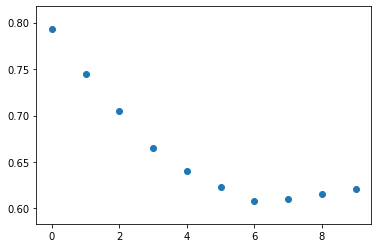

In [3]:
import natsort
from glob import glob
filenames = glob('/home/mcditoos/Desktop/DatosGerardo2/12/gerardo*.DAT')

filenames=natsort.natsorted(filenames)
filenames

Coincidencias=np.array([])
for i in filenames:
    C=pd.read_csv(i,sep='\t')
    C=C.drop([lista[0],lista[1],lista[2],lista[3],lista[5],lista[7]],axis=1)
    promedio=C[lista[8]].mean()
    Coincidencias=np.append(Coincidencias,promedio)

coincidencias12=Coincidencias[4:]/Coincidencias[3]

plt.scatter(range(10),coincidencias12)



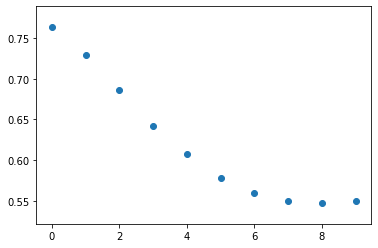

In [4]:
filenames = glob('/home/mcditoos/Desktop/DatosGerardo2/21/gerardo*.DAT')

filenames=natsort.natsorted(filenames)

Coincidencias=np.array([])
for i in filenames:
    C=pd.read_csv(i,sep='\t')
    C=C.drop([lista[0],lista[1],lista[2],lista[3],lista[5],lista[7]],axis=1)
    promedio=C[lista[8]].mean()
    Coincidencias=np.append(Coincidencias,promedio)

coincidencias21=Coincidencias[1:]/Coincidencias[0]

plt.scatter(range(10),coincidencias21)




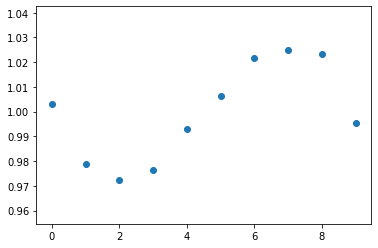

In [5]:
filenames = glob('/home/mcditoos/Desktop/DatosGerardo2/22/gerardo*.DAT')

filenames=natsort.natsorted(filenames)

Coincidencias=np.array([])
for i in filenames:
    C=pd.read_csv(i,sep='\t')
    C=C.drop([lista[0],lista[1],lista[2],lista[3],lista[5],lista[7]],axis=1)
    promedio=C[lista[8]].mean()
    Coincidencias=np.append(Coincidencias,promedio)

coincidencias22=Coincidencias[2:]/Coincidencias[1]

plt.scatter(range(10),coincidencias22)

In [6]:
from sympy import *

In [54]:
gamma1,gamma2,beta,theta=symbols('gamma1 gamma2 beta theta',real=True)
def N_mach(N,k):
    if k==1:
        lista=list()
        K=symarray('theta', N+1,real=True)
        for i in range(1,N+1):
            l=i
            BS=Matrix([[cos(K[i]),I*sin(K[i])],[I*sin(K[i]),cos(K[i])]])
            lista.append(BS)
    else:
        t=Symbol('theta1',real=True)
        lista=Matrix([[cos(t/N),I*sin(t/N)],[I*sin(t/N),cos(t/N)]])
    return lista
def N_mach_zehnder(N,k):
    K=N_mach(N,k)
    jones1= Matrix([0,1])
    jones0= Matrix([1,0])
    M1=Matrix([[0,exp(I*gamma2)],[exp(I*gamma1),0]])
    objeto=Matrix([[ beta,0],[0,1]])
    r=jones0
    if k==1:
        for i in range(0,N):
            if i==N-1:
                r=simplify(K[i]*r)
            else:
                r=simplify(M1*objeto*K[i]*r)
    else:
        r=K*(M1*objeto*K)**(N-1)*r
    return r
        
def N_Interferomemer(N,k):
    jones1= Matrix([0,1])
    jones0= Matrix([1,0])
    r=N_mach_zehnder(N,k)
    p1=jones0.T*r
    p1=p1[0]*conjugate(p1[0])
    p1=re(p1)
    p2=jones1.T*r
    p2=p2[0]*conjugate(p2[0])
    p2=re(p2)
    pabs=1-p1-p2
    K=symarray('theta', N+1,real=True)
    return pabs,p1,p2,K

In [8]:
pabs,pd1,pd2,K=N_Interferomemer(2,1)

In [9]:
pd1=simplify(pd1.subs({K[1]:pi/4,K[2]:pi/4,beta:cos(theta)}))
pd1

cos(theta)**2/4 + cos(theta)*cos(gamma1 - gamma2)/2 + 1/4

In [10]:
import numpy as np
valores=[0,np.pi/18,np.pi/9,np.pi/6,40*np.pi/180,50*np.pi/180,np.pi/3,7*np.pi/18,8*np.pi/18,np.pi/2]
#data=np.array([])
#for i in valores:
    #nuevo=pd1.subs({theta:i})
    #data=np.append(data,nuevo)
valores

[0,
 0.17453292519943295,
 0.3490658503988659,
 0.5235987755982988,
 0.6981317007977318,
 0.8726646259971648,
 1.0471975511965976,
 1.2217304763960306,
 1.3962634015954636,
 1.5707963267948966]

In [11]:
f = lambdify([theta, gamma1, gamma2], pd1)

Parameters [1.19934683 0.34482205]
RMSE: 0.17656790723320745
R-squared: -5.505517897039463


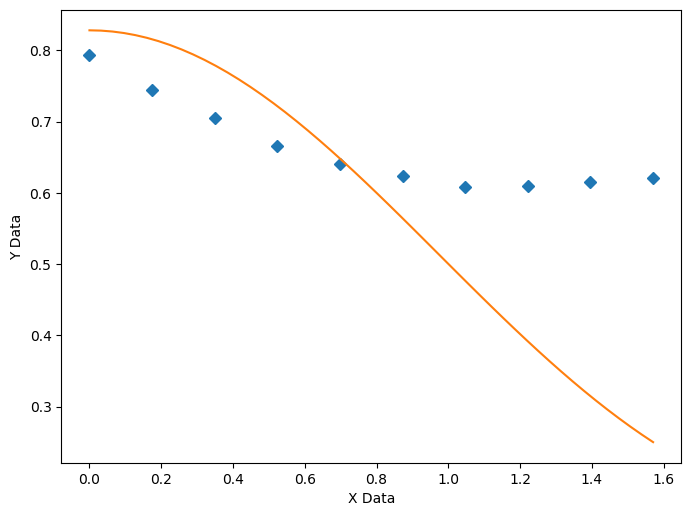

In [12]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

xData = valores
yData = coincidencias12


def func(x, gamma1, gamma2): # Sigmoid A With Offset from zunzun.com
    return  f(x,gamma1,gamma2)


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([minX, maxX]) # search bounds for a
    parameterBounds.append([minX, maxX]) # search bounds for b

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

In [13]:
pd2=simplify(pd2.subs({K[1]:pi/4,K[2]:pi/4,beta:cos(theta)}))
f2 = lambdify([theta, gamma1, gamma2], pd2)
pd2

cos(theta)**2/4 - cos(theta)*cos(gamma1 - gamma2)/2 + 1/4

Parameters [113.4282665  110.28667385]
RMSE: 0.41537023229811515
R-squared: -210.10298916662413


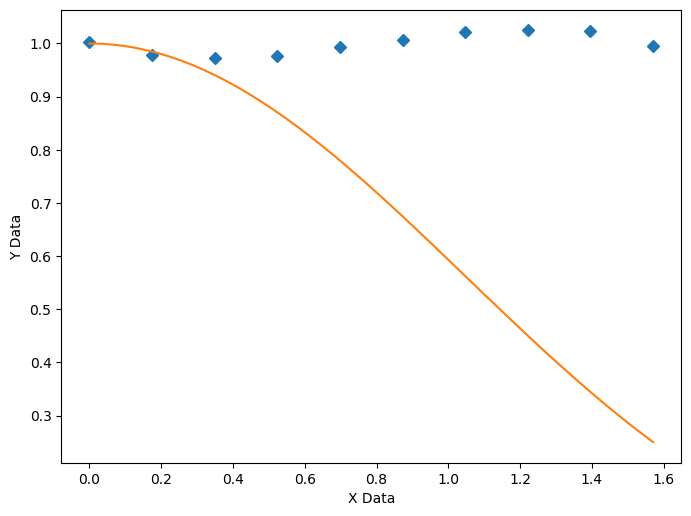

In [14]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

xData = valores
yData = coincidencias22


def func(x, gamma1, gamma2): # Sigmoid A With Offset from zunzun.com
    return  f2(x,gamma1,gamma2)


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([minX, maxX]) # search bounds for a
    parameterBounds.append([minX, maxX]) # search bounds for b

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

In [15]:
filenames = glob('/home/mcditoos/Desktop/DatosGerardo2/22/gerardo*.DAT')

filenames=natsort.natsorted(filenames)

Coincidencias1=np.array([])
for i in filenames:
    C=pd.read_csv(i,sep='\t')
    C=C.drop([lista[0],lista[1],lista[2],lista[3],lista[5],lista[7]],axis=1)
    promedio=C[lista[8]].mean()
    Coincidencias1=np.append(Coincidencias1,promedio)

coincidencias1=Coincidencias1[2:]

In [16]:
filenames = glob('/home/mcditoos/Desktop/DatosGerardo2/12/gerardo*.DAT')

filenames=natsort.natsorted(filenames)

Coincidencias2=np.array([])
for i in filenames:
    C=pd.read_csv(i,sep='\t')
    C=C.drop([lista[0],lista[1],lista[2],lista[3],lista[5],lista[7]],axis=1)
    promedio=C[lista[8]].mean()
    Coincidencias2=np.append(Coincidencias2,promedio)
coincidencias2=Coincidencias2[4:]

In [17]:
total=Coincidencias1[1]+Coincidencias2[0]
total

6262.23

In [18]:
coincidencias1=coincidencias1/total
coincidencias2=coincidencias2/total

Parameters [49.1508532  48.1838935   0.30767676]
RMSE: 0.027804485963848474
R-squared: -7.588210525371615


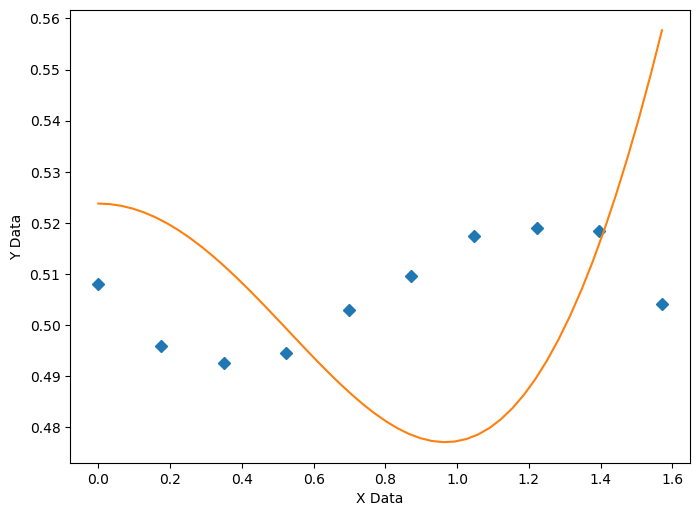

In [19]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

xData = valores
yData = coincidencias1


def func(x, gamma1, gamma2,off): # Sigmoid A With Offset from zunzun.com
    return  f2(x,gamma1,gamma2)+off


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([minX, maxX]) # search bounds for a
    parameterBounds.append([minX, maxX]) # search bounds for b
    parameterBounds.append([minX, maxX]) # search bounds for b

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

Parameters [177.18793379 175.41613076]
RMSE: 0.039130787212351706
R-squared: -0.30740847599420773


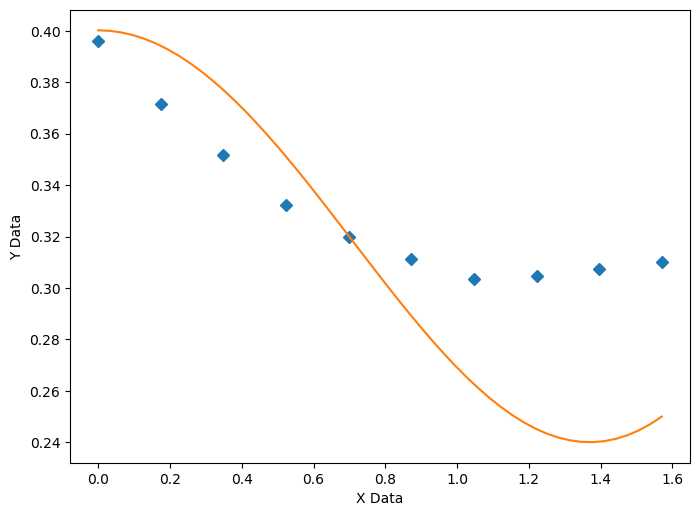

In [20]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

xData = valores
yData = coincidencias2


def func(x, gamma1, gamma2): # Sigmoid A With Offset from zunzun.com
    return  f(x,gamma1,gamma2)


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([minX, maxX]) # search bounds for a
    parameterBounds.append([minX, maxX]) # search bounds for b

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

# O alternativamente

In [55]:
filenames = glob('/home/mcditoos/Desktop/DatosGerardo2/11/gerardo*.DAT')

filenames=natsort.natsorted(filenames)

Coincidencias2=np.array([])
for i in filenames:
    C=pd.read_csv(i,sep='\t')
    C=C.drop([lista[0],lista[1],lista[2],lista[3],lista[5],lista[7]],axis=1)
    promedio=C[lista[8]].mean()
    Coincidencias2=np.append(Coincidencias2,promedio)
coincidencias2=Coincidencias2[1:]

In [56]:
filenames = glob('/home/mcditoos/Desktop/DatosGerardo2/21/gerardo*.DAT')

filenames=natsort.natsorted(filenames)

Coincidencias1=np.array([])
for i in filenames:
    C=pd.read_csv(i,sep='\t')
    C=C.drop([lista[0],lista[1],lista[2],lista[3],lista[5],lista[7]],axis=1)
    promedio=C[lista[8]].mean()
    Coincidencias1=np.append(Coincidencias1,promedio)

coincidencias1=Coincidencias1[1:]

In [57]:
#tata=coincidencias1+coincidencias2
#tata
#for i in range(len(tata)):
  #  coincidencias1[i]=coincidencias1[i]/tata[i]
   # coincidencias2[i]=coincidencias2[i]/tata[i]

In [58]:
C=pd.read_csv('/home/mcditoos/Desktop/DatosGerardo2/21/gerardosin2.DAT',sep='\t')
C=C.drop([lista[0],lista[1],lista[2],lista[3],lista[5],lista[7]],axis=1)
promedio1=C[lista[8]].mean()
C=pd.read_csv('/home/mcditoos/Desktop/DatosGerardo2/11/gerardosin1nada.DAT',sep='\t')
C=C.drop([lista[0],lista[1],lista[2],lista[3],lista[5],lista[7]],axis=1)
promedio2=C[lista[8]].mean()

In [59]:
tata=promedio1+promedio2
tata
coincidencias1=coincidencias1/tata
coincidencias2=coincidencias2/tata

In [60]:
coincidencias1

array([0.3501052 , 0.33449798, 0.31484016, 0.29452242, 0.27869639,
       0.26516348, 0.25671569, 0.25263709, 0.25152379, 0.2526651 ])

In [61]:
coincidencias2

array([0.54245773, 0.55640201, 0.56152389, 0.56450495, 0.55682562,
       0.5430739 , 0.53102189, 0.5229242 , 0.51968057, 0.52593677])

In [62]:
theta1,theta2=symbols('theta1 theta2',real=True)
pabs,pd1,pd2,K=N_Interferomemer(2,1)
pd2=simplify(pd2.subs({K[1]:theta1,K[2]:theta2,beta:cos(theta)}))
f2 = lambdify([theta, theta1,theta2,gamma1, gamma2], pd2)
pd1=simplify(pd1.subs({K[1]:theta1,K[2]:theta2,beta:cos(theta)}))
f1 = lambdify([theta, theta1,theta2,gamma1, gamma2], pd1)

Parameters [0.83548187 0.77417744 0.86052483 2.10731865]
RMSE: 0.00875745448315057
R-squared: 0.9367805225861383


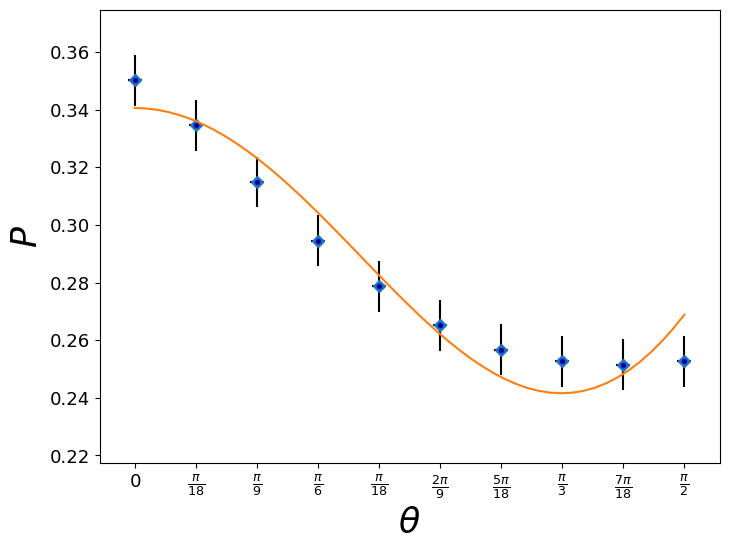

In [63]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

xData = valores
yData = coincidencias1


def func(x, theta1,theta2,gamma1, gamma2): # Sigmoid A With Offset from zunzun.com
    return  f2(x,theta1,theta2,gamma1,gamma2)


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([0.684719203, 0.83548187397]) # search bounds for a
    parameterBounds.append([0.684719203, 0.83548187397]) # search bounds for b
    parameterBounds.append([0.684719203, maxX]) # search bounds for b
    parameterBounds.append([0.684719203, maxX]) # search bounds for b

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters,bounds=(0.684719203, [0.83548187397, 0.83548187397, 1000,1000]))

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_ylabel(r'$P$',size=25) # X axis data label
    axes.set_xlabel(r'$\theta$',size=25) # Y axis data label
    plt.ylim(min(yModel)-(min(yModel)/10),max(yModel)+(max(yModel)/10))
    plt.errorbar(xData, yData, RMSE,0.02, marker='.',mec='b',mfc='black',color='black',ls='none')
    plt.yticks(size=13)
    plt.xticks([0,np.pi/18,np.pi/9,np.pi/6,40*np.pi/180,50*np.pi/180,np.pi/3,7*np.pi/18,8*np.pi/18,np.pi/2],[r'$0$',r'$\frac{\pi}{18}$',r'$\frac{\pi}{9}$',r'$\frac{\pi}{6}$',
                                                                                                             r'$\frac{\pi}{18}$',r'$\frac{2\pi}{9}$',r'$\frac{5\pi}{18}$',r'$\frac{\pi}{3}$',
                                                                                                            r'$\frac{7\pi}{18}$',r'$\frac{\pi}{2}$',],size=13)
    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

Parameters [0.6847192  0.6847192  0.87894253 2.65475886]
RMSE: 0.08887109940867408
R-squared: -23.106751314443734


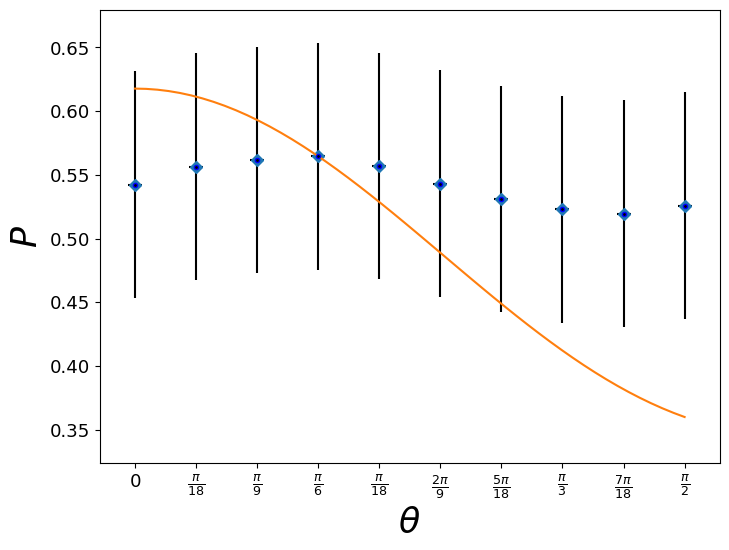

In [46]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

xData = valores
yData = coincidencias2


def func(x, theta1,theta2,gamma1, gamma2): # Sigmoid A With Offset from zunzun.com
    return  f2(x,theta1,theta2,gamma1,gamma2)


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([0.684719203, 0.83548187397]) # search bounds for a
    parameterBounds.append([0.684719203, 0.83548187397]) # search bounds for b
    parameterBounds.append([0.684719203, maxX]) # search bounds for b
    parameterBounds.append([0.684719203, maxX]) # search bounds for b

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters,bounds=(0.684719203, [0.83548187397, 0.83548187397, 1000,1000]))

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_ylabel(r'$P$',size=25) # X axis data label
    axes.set_xlabel(r'$\theta$',size=25) # Y axis data label
    plt.ylim(min(yModel)-(min(yModel)/10),max(yModel)+(max(yModel)/10))
    plt.errorbar(xData, yData, RMSE,0.02, marker='.',mec='b',mfc='black',color='black',ls='none')
    plt.yticks(size=13)
    plt.xticks([0,np.pi/18,np.pi/9,np.pi/6,40*np.pi/180,50*np.pi/180,np.pi/3,7*np.pi/18,8*np.pi/18,np.pi/2],[r'$0$',r'$\frac{\pi}{18}$',r'$\frac{\pi}{9}$',r'$\frac{\pi}{6}$',
                                                                                                             r'$\frac{\pi}{18}$',r'$\frac{2\pi}{9}$',r'$\frac{5\pi}{18}$',r'$\frac{\pi}{3}$',
                                                                                                            r'$\frac{7\pi}{18}$',r'$\frac{\pi}{2}$',],size=13)
    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

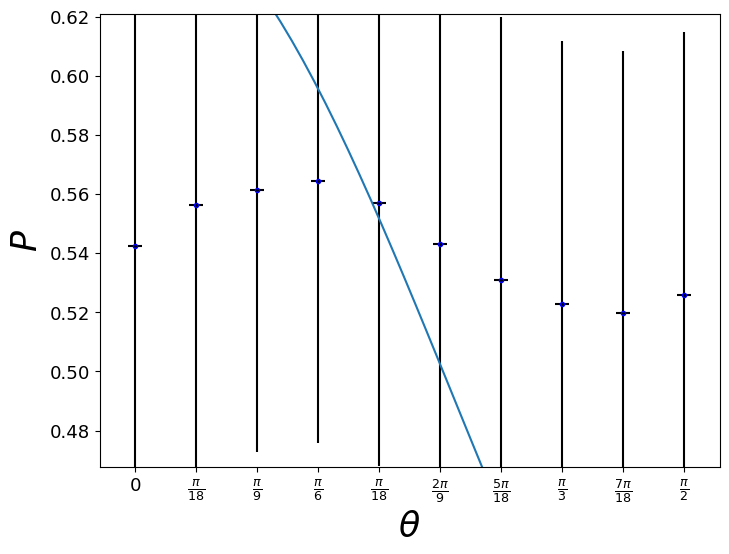

In [50]:
f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
axes = f.add_subplot(111)

    # first the raw data as a scatter plot
xData = valores
yData = coincidencias2
    # create data for the fitted equation plot
xModel = numpy.linspace(min(xData), max(xData))
yModel = f2(xModel,0.6847192  ,0.73046683, 0.89202309 ,2.77420303)

    # now the model as a line plot 
axes.plot(xModel, yModel)
axes.set_ylabel(r'$P$',size=25) # X axis data label
axes.set_xlabel(r'$\theta$',size=25) # Y axis data label
plt.ylim(min(yData)-(min(yData)/10),max(yData)+(max(yData)/10))
plt.errorbar(xData, yData, RMSE,0.02, marker='.',mec='b',mfc='black',color='black',ls='none')
plt.yticks(size=13)
plt.xticks([0,np.pi/18,np.pi/9,np.pi/6,40*np.pi/180,50*np.pi/180,np.pi/3,7*np.pi/18,8*np.pi/18,np.pi/2],[r'$0$',r'$\frac{\pi}{18}$',r'$\frac{\pi}{9}$',r'$\frac{\pi}{6}$',
                                                                                                             r'$\frac{\pi}{18}$',r'$\frac{2\pi}{9}$',r'$\frac{5\pi}{18}$',r'$\frac{\pi}{3}$',
                                                                                                            r'$\frac{7\pi}{18}$',r'$\frac{\pi}{2}$',],size=13)

plt.show()
plt.close('all') # clean up after using pyplot

In [65]:
cos(0.83548187)**2  

0.450000003958287

In [66]:
cos( 0.77417744)**2

0.511219781593786

In [ ]:
0.66421524 0.83548187